<a href="https://colab.research.google.com/github/anwarbabukm/Automatic_Number_Plate_Recognition/blob/main/Automatic_Number_Plate_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
pip install opencv-python

In [ ]:
import cv2
import pytesseract

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving VW.jpg to VW (4).jpg


In [ ]:
# Reading the image of vehicle
image = cv2.imread('VW (4).jpg')

In [ ]:

# Converting to Grayscale Image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Canny Edge Detection
canny_edge = cv2.Canny(gray_image, 170, 200)

In [ ]:
# Finding contours based on Edges
contours, new  = cv2.findContours(canny_edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours=sorted(contours, key = cv2.contourArea, reverse = True)[:30]

In [ ]:
contour_number_plate = None
number_plate = None
x = None
y = None
w = None
h = None

# Find the contour with 4 corners
for contour in contours:
        # Find Perimeter and check if contour is closed one
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.01 * perimeter, True)
        if len(approx) == 4: #to check if it is a rectangle
            contour_number_plate = approx
            x, y, w, h = cv2.boundingRect(contour)
            number_plate = gray_image[y:y + h, x:x + w]
            break

# Removing Noise from the detected image
number_plate = cv2.bilateralFilter(number_plate, 11, 17, 17)
(thresh, number_plate) = cv2.threshold(number_plate, 150, 180, cv2.THRESH_BINARY)

#Text Recognition
text = pytesseract.image_to_string(number_plate)

#Draw Number Plate and write the Text
image = cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 3) 
image = cv2.putText(image, text, (x-250,y-50), cv2.FONT_HERSHEY_SIMPLEX, 3, (255,0,0), 6, cv2.LINE_AA)

Number_Plate : BG#224-NZ

Number_Plate Detection:


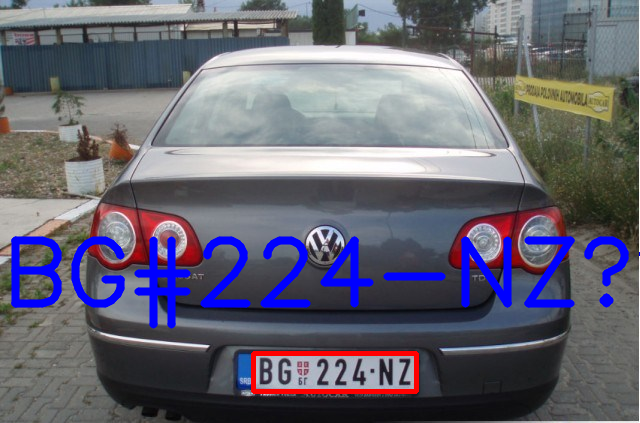

-1

In [ ]:
print("Number_Plate :", text)
from google.colab.patches import cv2_imshow

print("Number_Plate Detection:")
cv2_imshow(image)
cv2.waitKey(0)